# Ridge Regression with Holdout: Gas Mileage Prediction

In [82]:
import numpy as np
import pandas as pd
# import piplite
# await piplite.install('seaborn')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statistics import stdev, mean

# Reference: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

from ucimlrepo import fetch_ucirepo 
# fetch dataset 
energy_efficiency = fetch_ucirepo(id=242) 
# data (as pandas dataframes) 
features = energy_efficiency.data.features 
targets = energy_efficiency.data.targets 
# metadata 
print(energy_efficiency.metadata) 
# variable information 
print(energy_efficiency.variables) 

{'uci_id': 242, 'name': 'Energy Efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'ID': 379, 'type': 'NATIVE', 'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine 

Split the data into 70% training, 15% validation, and 15% testing.

In [83]:
# Extract the regressors and the target from the data frame
x, y = features.iloc[:,:].to_numpy(), targets.iloc[:,0].to_numpy()
print(x)

# Hold out the validation and test data
X_train, X_2, y_train, y_2 = train_test_split(x, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=0)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

# Search over different regularization parameter values
max_R2 = 0
best_alpha = 0
best_mdl = 0
for alpha in np.array([0, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]):
    mdl = make_pipeline(StandardScaler(),
                        Ridge(alpha=alpha)).fit(X_train,y_train)
    print(f"Alpha: {alpha}")
    train_R2 = mdl.score(X_train,y_train)
    val_R2 = mdl.score(X_val,y_val)
    test_R2 = mdl.score(X_test,y_test)
    print(f"\tCoefficients: {mdl[1].coef_}")
    print(f"\tIntercept: {mdl[1].intercept_}")
    print(f"\tTraining accuracy (R2): {train_R2}")
    print(f"\tValidation accuracy (R2): {val_R2}")
    print(f"\tTesting accuracy (R2): {test_R2}")
    if val_R2 > max_R2:
        max_R2 = val_R2
        best_alpha = alpha
        best_mdl = mdl

x_transpose = x.transpose()
std_list = []
mean_list = []
for i in range(x_transpose.shape[0]):
    std_list.append(stdev(x_transpose[i]))
    mean_list.append(mean(x_transpose[i]))
    


[[9.800e-01 5.145e+02 2.940e+02 ... 2.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 3.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 4.000e+00 0.000e+00 0.000e+00]
 ...
 [6.200e-01 8.085e+02 3.675e+02 ... 3.000e+00 4.000e-01 5.000e+00]
 [6.200e-01 8.085e+02 3.675e+02 ... 4.000e+00 4.000e-01 5.000e+00]
 [6.200e-01 8.085e+02 3.675e+02 ... 5.000e+00 4.000e-01 5.000e+00]]
(460, 8)
(154, 8)
(154, 8)
Alpha: 0.0
	Coefficients: [-5.93624728e+00  5.34945614e+12 -2.68630035e+12 -5.48793666e+12
  7.53209851e+00 -9.10125699e-02  2.52203646e+00  2.79212002e-01]
	Intercept: 22.32028237453774
	Training accuracy (R2): 0.9241980454101254
	Validation accuracy (R2): 0.9089325866573276
	Testing accuracy (R2): 0.894841002867466
Alpha: 0.001
	Coefficients: [-5.93451702 -3.18578276  0.82778905 -3.51058993  7.53186822 -0.09785126
  2.52230988  0.27823879]
	Intercept: 22.315260869565197
	Training accuracy (R2): 0.9241944125357854
	Validation accuracy (R2): 0.908914679464180

Evaluate the best model on test data.

Best alpha: 0.0
Coefficients: [-5.93624728e+00  5.34945614e+12 -2.68630035e+12 -5.48793666e+12
  7.53209851e+00 -9.10125699e-02  2.52203646e+00  2.79212002e-01]
Intercept: 22.32028237453774
-5.936247276370394 0.7641666666666667 0.10577747587475192
5349456137019.634 671.7083333333334 88.08611605586836
-2686300352366.7095 318.5 43.6264814379949
-5487936659027.041 176.60416666666666 45.16595022292048
7.532098510049991 5.25 1.7511404367453496
-0.09101256989896986 3.5 1.1187625870603635
2.5220364598798866 0.234375 0.13322056291470774
0.27921200186266626 2.8125 1.5509596642247507
Normalized coefficients: [-63.344430254422306, 60729844564.3244, -61574994456.13493, -121506060032.33534, 1.3032070199300945, -3.209807524342262, 17.171984638321366, -1.633368073052758]
Last 5 values are most important: [6 0 1 2 3]
Testing accuracy (R2) of Best Model: 0.894841002867466


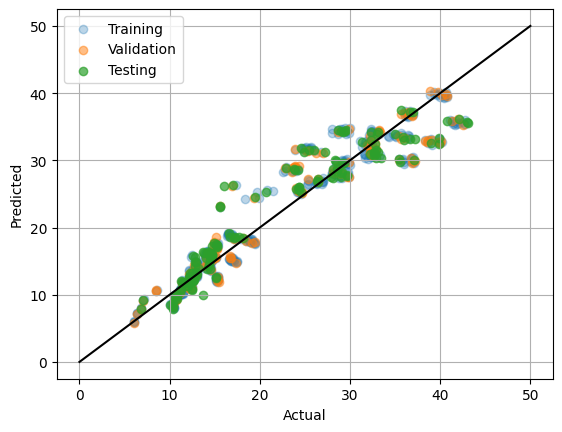

In [84]:
# Print results of the best model
print(f"Best alpha: {best_alpha}")
print(f"Coefficients: {best_mdl[1].coef_}")
print(f"Intercept: {best_mdl[1].intercept_}")

normalized_coefficients = []
for i in range(len(best_mdl[1].coef_)):
    print(best_mdl[1].coef_[i], mean_list[i], std_list[i])
    normalized_coefficients.append((best_mdl[1].coef_[i] - mean_list[i]) / std_list[i])
print(f"Normalized coefficients: {normalized_coefficients}")
order = abs(np.array(normalized_coefficients)).argsort()
print(f"Last 5 values are most important: {order[-5:]}")

# Plot the Actual vs. Predicted values
test_R2 = best_mdl.score(X_test,y_test)
print(f"Testing accuracy (R2) of Best Model: {test_R2}")
y_train_pred = best_mdl.predict(X_train)
y_val_pred = best_mdl.predict(X_val)
y_test_pred = best_mdl.predict(X_test)
plt.plot(np.array([0, 50]),np.array([0, 50]),color='k',label='_nolegend_')
plt.scatter(y_train, y_train_pred, alpha=0.3, label="Training")
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Validation")
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Testing")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()

In [85]:
# Extract the regressors and the target from the data frame
x, y = features.iloc[:,[0,1,2,3,6]].to_numpy(), targets.iloc[:, 0].to_numpy()

# Hold out the validation and test data
X_train, X_2, y_train, y_2 = train_test_split(x, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=0)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

# Search over different regularization parameter values
max_R2 = 0
best_alpha = 0
best_mdl = 0
for alpha in np.array([0, 0.1, 0.5, 1, 5, 10, 50, 100]):
    mdl = make_pipeline(StandardScaler(),
                        Ridge(alpha=alpha)).fit(X_train,y_train)
    print(f"Alpha: {alpha}")
    train_R2 = mdl.score(X_train,y_train)
    val_R2 = mdl.score(X_val,y_val)
    test_R2 = mdl.score(X_test,y_test)
    print(f"\tCoefficients: {mdl[1].coef_}")
    print(f"\tIntercept: {mdl[1].intercept_}")
    print(f"\tTraining accuracy (R2): {train_R2}")
    print(f"\tValidation accuracy (R2): {val_R2}")
    print(f"\tTesting accuracy (R2): {test_R2}")
    if val_R2 > max_R2:
        max_R2 = val_R2
        best_alpha = alpha
        best_mdl = mdl

(460, 5)
(154, 5)
(154, 5)
Alpha: 0.0
	Coefficients: [-1.42380874e+01  3.24745289e+13 -1.63075154e+13 -3.33151919e+13
  2.61457409e+00]
	Intercept: 22.345744530735836
	Training accuracy (R2): 0.9056360066225404
	Validation accuracy (R2): 0.8837276012779336
	Testing accuracy (R2): 0.888057429521733
Alpha: 0.1
	Coefficients: [-13.80038768 -10.92458673   0.57633192 -10.93102962   2.61174795]
	Intercept: 22.31526086956518
	Training accuracy (R2): 0.9055744877885293
	Validation accuracy (R2): 0.8832351027432764
	Testing accuracy (R2): 0.8877608764732744
Alpha: 0.5
	Coefficients: [-12.5364812  -10.20845177   0.86187002 -10.37273391   2.60885734]
	Intercept: 22.315260869565183
	Training accuracy (R2): 0.9052030135206186
	Validation accuracy (R2): 0.8815734861453774
	Testing accuracy (R2): 0.886357508677013
Alpha: 1.0
	Coefficients: [-11.21601513  -9.46016268   1.15955969  -9.78904354   2.60541518]
	Intercept: 22.315260869565186
	Training accuracy (R2): 0.9043045398721159
	Validation accuracy 

Best alpha: 0.0
Coefficients: [-1.42380874e+01  3.24745289e+13 -1.63075154e+13 -3.33151919e+13
  2.61457409e+00]
Intercept: 22.345744530735836
Testing accuracy (R2) of Best Model: 0.888057429521733


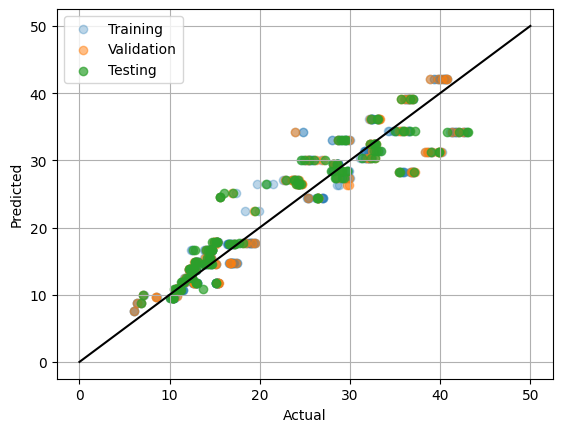

In [86]:
# Print results of the best model
print(f"Best alpha: {best_alpha}")
print(f"Coefficients: {best_mdl[1].coef_}")
print(f"Intercept: {best_mdl[1].intercept_}")

# Plot the Actual vs. Predicted values
test_R2 = best_mdl.score(X_test,y_test)
print(f"Testing accuracy (R2) of Best Model: {test_R2}")
y_train_pred = best_mdl.predict(X_train)
y_val_pred = best_mdl.predict(X_val)
y_test_pred = best_mdl.predict(X_test)
plt.plot(np.array([0, 50]),np.array([0, 50]),color='k',label='_nolegend_')
plt.scatter(y_train, y_train_pred, alpha=0.3, label="Training")
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Validation")
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Testing")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()